In [ ]:
# Given a list of book titles, access the google API and return the respective authors of each book.
import json
from urllib.request import urlopen
import ethnicolr
import pandas as pd
api = "https://www.googleapis.com/books/v1/volumes?q=title:"
import csv
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def getBookInfo(title):
    title = title.replace(' ', '%')
    url = api + title
    response = urlopen(url)
    data = json.loads(response.read())
    return data

## Setting up
Getting the api keys and access initialized

In [ ]:
title = ['How to Invent Everything','Percy Jackson','Oxford Dictionary']
namesDF = pd.DataFrame()
for bookTitle in title:
    bookInfo =getBookInfo(bookTitle)['items'][0]['volumeInfo']
    author = bookInfo['authors'][0].split(' ')
    lastName = author[-1]
    firstName = author[0]
    # Taking the first result for the search query which is index 0, getting information about the book and then printing the author of the book.
    namesDF = namesDF.append({'Title':bookTitle,'last':lastName,'first': firstName},ignore_index=True)

namesDF = namesDF.append({'first':'Azal','last':'Amer'},ignore_index=True)
namesDF = namesDF.append({'first':'Madison','last':'rojas'},ignore_index=True)
namesDF = namesDF.append({'first':'Shreeya','last':'Madhavanur'},ignore_index=True)
namesDF = namesDF.append({'first':'Teja','last':'Mettu'},ignore_index=True)
namesDF = namesDF.append({'first':'Demarcus','last':'Powell'},ignore_index=True)
namesDF = namesDF.append({'first':'Areeba','last':'Amer'},ignore_index=True)
namesDF = namesDF.append({'first':'Areeba','last':'Amer'},ignore_index=True)
namesDF = namesDF.append({'first':'Angela','last':'Kamgange'},ignore_index=True)


## Trying API's for name-ethnicity prediction
The winner is.... the Wikipedia Full name model!

In [ ]:
ethnicity = ethnicolr.pred_wiki_name(namesDF,'last','first')
merged = pd.concat([namesDF,ethnicity['race']],axis = 1)
merged.drop(['last','first','rowindex','Title'],axis = 1,inplace = True)
print(merged)

In [ ]:
import requests
# https://namsor.app/api-documentation.html?python#namsor-api
# Okay the issue with namsoor is that I can only analyze 500 names monthly, then I need to pay for a higher plan.
url = "https://v2.namsor.com/NamSorAPIv2/api2/json/origin/Angela/Kamgange"
headers = {
 "Accept": "application/json",
 "X-API-KEY": "88cb4dfd3faea7d4379fafc2eb3dca9e"
}

response = requests.request("GET", url, headers=headers)

print(response.json()['countryOrigin'])

In [ ]:
classOf2023= pd.read_csv('Student Directory.csv')
frontRemove = len('Options \r\n Message \r\n Add to Contacts \r\n Contact Card')
def formatName(string):
    string = str(string)
    string = string.split('Add to Contacts')[1]
    string = string.split('Contact Card')
    if(len(string)>1):
        string = string[1]
    else:
        string = string[0]
    string = str(string).split('\'23')[0]
    string = string[1:]
    string = string[:-1]
    
    return string
list = classOf2023[classOf2023.columns[1]].tolist()
formattedlist = []
for name in list:
    formatted = formatName(name).split(' ')
    formatted = [formatted[0],formatted[-1]]
    formattedlist.append(formatted)
i=0
classOf2023 = pd.DataFrame(formattedlist,columns = ['first','last'])
classOf2023.to_csv('classOf2023.csv')

In [ ]:
ethnicity = ethnicolr.pred_wiki_name(classOf2023,'last','first')


In [281]:
def plotMerged(ethnicity,title):
    merged = pd.concat([classOf2023,ethnicity['race']],axis = 1)
    merged.drop(['last','first'],axis = 1,inplace = True)
    merged['race']=merged['race'].str.split(',',expand = False)
    # Okay what I need to do is go through all the lists in race, and if it contains hispanic, make that the value
    for i,race in enumerate(merged['race'].tolist()):
        if('Hispanic' in race):
            merged['race'][i] = 'hispanic'
        else:
            merged['race'][i]= merged['race'][i][0]
    
    fig, ax = plt.subplots(figsize = (5,5))
    plt.subplot(1, 2, 1)
    merged['race'].value_counts().plot.pie(autopct='%1.1f%%')
    fig.set_facecolor('lightgrey')
    plt.title(title)

In [ ]:
ethnicity1 = ethnicolr.pred_wiki_ln(classOf2023,'last',num_iter=100, conf_int=0.9)


In [ ]:
ethnicityCensusFull = ethnicolr.pred_census_ln(classOf2023,'last',year = 2010)


In [ ]:
ethnicityFLlast = ethnicolr.pred_fl_reg_ln(classOf2023, 'last', num_iter=100, conf_int=0.9)
ethnicityFLlast = ethnicityFLlast.rename(columns = {'true_race':'race'})

In [ ]:
ethnicityFlfull = ethnicolr.pred_fl_reg_name(classOf2023, 'last','first', num_iter=100, conf_int=0.9)
ethnicityFLlast =  ethnicityFlfull.rename(columns = {'true_race':'race'})

In [ ]:

plotMerged(ethnicity1,'Wikipedia Last Name Source Estimate')
plotMerged(ethnicity,'Wikipedia Full Name Source Estimate')
plotMerged(ethnicityCensusFull,'Cencus Last Name Source Estimate')
plotMerged(ethnicityFLlast,'Florida Last name Estimate')
plotMerged(ethnicityFlfull,'Florida Full Name Estimate')

ValueError: Number of rows must be a positive integer, not AxesSubplot(0.125,0.125;0.352273x0.755)

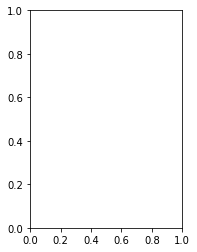

<Figure size 360x360 with 0 Axes>

In [290]:
merged = pd.concat([classOf2023,ethnicity['race']],axis = 1)
merged.drop(['last','first'],axis = 1,inplace = True)
merged['race']=merged['race'].str.split(',',expand = False)
# Okay what I need to do is go through all the lists in race, and if it contains hispanic, make that the value
for i,race in enumerate(merged['race'].tolist()):
    if('Hispanic' in race):
        merged['race'][i] = 'hispanic'
    else:
        merged['race'][i]= merged['race'][i][0]



fig, ax = plt.subplots(nrows=1, ncols=2,,figsize = (5,5))

plt.subplot(1, 2, 1)
merged['race'].value_counts().plot.pie(autopct='%1.1f%%')
fig.set_facecolor('lightgrey')
plt.title('Wikipedia Full Name Source Estimate') # index 2

df = pd.read_csv('classOf2023.csv')
df['race'].value_counts().plot.pie(autopct='%1.1f%%')
fig.set_facecolor('lightgrey')
plt.title('Actual Data')
